In [1]:
from evaluation import *

In [4]:
result = total_evaluation()

fitness:0.999700827193071, prec:0.787283459301508, gen:0.8263249941080422, simp:0.8263249941080422, weighted by # traces
fitness:0.9767583762595307, prec:0.7962855475375326, gen:0.633956065464121, simp:0.633956065464121, weighted by # traces
fitness:0.9086082725326275, prec:0.8274639859263168, gen:0.5901123516645513, simp:0.5901123516645513, weighted by # traces
fitness:0.9854778435346978, prec:0.8119079837158718, gen:0.5448115841749406, simp:0.5448115841749406, weighted by # traces


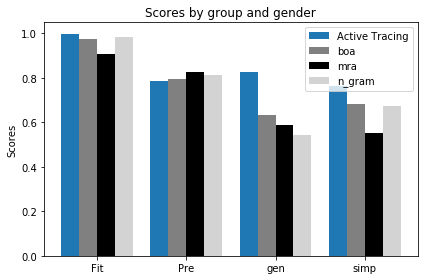

In [5]:
visualize_evaluation(result)